### Global Activation Pooling
### Dataset used:- ALL-IDB:Acute Lymphoblastic Leukemia Image Database for Image Processing

In [1]:
%matplotlib inline
import torch
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import torchvision
from torch.autograd import Variable
from torch.utils.data import TensorDataset,DataLoader
from torchvision import models
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import time
import os
import copy

In [2]:
Datapath = 'ALL_IDB2/img/'
listing = os.listdir(Datapath)

In [3]:
# ALL_IDB2 dataset has 260 images in total
TrainImages = torch.FloatTensor(200,3,224,224)
TrainLabels = torch.LongTensor(200)
TestImages = torch.FloatTensor(60,3,224,224)
TestLabels = torch.LongTensor(60)

# First 200 images are used for training and the remaining 60 for testing
img_no = 0
for file in listing:
    im=Image.open(Datapath + file)
    im = im.resize((224,224))
    im = np.array(im)   
    if img_no < 200:
        TrainImages[img_no] = torch.from_numpy(im).transpose(0,2).unsqueeze(0)
        TrainLabels[img_no] = int(listing[img_no][6:7])
    else:
        TestImages[img_no - 200] = torch.from_numpy(im).transpose(0,2).unsqueeze(0)
        TestLabels[img_no - 200] = int(listing[img_no][6:7])
    img_no = img_no + 1

In [4]:
print(TrainImages.size())
print(TrainLabels.size())
print(TestImages.size())
print(TestLabels.size())

torch.Size([200, 3, 224, 224])
torch.Size([200])
torch.Size([60, 3, 224, 224])
torch.Size([60])


In [5]:
# Creating pytorch dataset
trainDataset = TensorDataset(TrainImages, TrainLabels)
testDataset = TensorDataset(TestImages, TestLabels)
# Creating dataloader
BatchSize = 32
trainLoader = DataLoader(trainDataset, batch_size=BatchSize, shuffle=True,num_workers=4, pin_memory=True)
testLoader = DataLoader(testDataset, batch_size=BatchSize, shuffle=True,num_workers=4, pin_memory=True)

In [6]:
# Check availability of GPU
use_gpu = torch.cuda.is_available()
if use_gpu:
    print('GPU is available!')

GPU is available!


### Initialize the Network

In [7]:
# ResNet18
net = models.resnet18(pretrained=True)
num_ftrs = net.fc.in_features
net.fc = nn.Linear(num_ftrs, 2)
print(net)
if use_gpu:
    net = net.cuda()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), dilation=(1, 1), ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (b

In [8]:
criterion = nn.NLLLoss() # Negative Log-Likelihood
optimizer = optim.SGD(net.parameters(), lr=1e-3 , momentum=0.9) # Stochastic gradient descent

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


At Iteration: 1 /15  ;  Training Loss: 0.023670 ; Training Acc: 55.500 ; Time consumed: 0m 4s 
At Iteration: 1 /15  ;  Testing Loss: 0.024144 ; Testing Acc: 55.000 ; Time consumed: 0m 4s 
At Iteration: 2 /15  ;  Training Loss: 0.013225 ; Training Acc: 88.000 ; Time consumed: 0m 2s 
At Iteration: 2 /15  ;  Testing Loss: 0.018536 ; Testing Acc: 75.000 ; Time consumed: 0m 2s 
At Iteration: 3 /15  ;  Training Loss: 0.008990 ; Training Acc: 94.500 ; Time consumed: 0m 2s 
At Iteration: 3 /15  ;  Testing Loss: 0.016061 ; Testing Acc: 88.333 ; Time consumed: 0m 2s 
At Iteration: 4 /15  ;  Training Loss: 0.005200 ; Training Acc: 97.500 ; Time consumed: 0m 2s 
At Iteration: 4 /15  ;  Testing Loss: 0.012077 ; Testing Acc: 95.000 ; Time consumed: 0m 2s 
At Iteration: 5 /15  ;  Training Loss: 0.003110 ; Training Acc: 99.500 ; Time consumed: 0m 2s 
At Iteration: 5 /15  ;  Testing Loss: 0.009884 ; Testing Acc: 85.000 ; Time consumed: 0m 2s 
At Iteration: 6 /15  ;  Training Loss: 0.002248 ; Training A

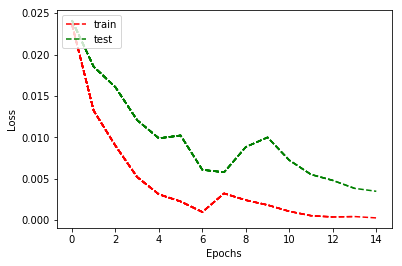

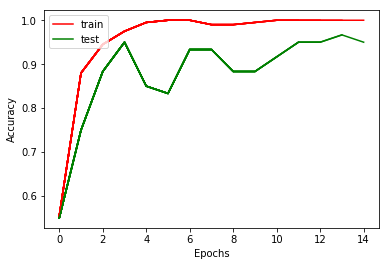

In [9]:
iterations = 15
trainLoss = []
trainAcc = []
testLoss = []
testAcc = []
start = time.time()

for epoch in range(iterations):
    epochStart = time.time()
    runningLoss = 0   
    runningCorr = 0
    net.train(True) # For training
    for data in trainLoader:
        inputs,labels = data
        # Wrap them in Variable
        if use_gpu:
            inputs, labels = Variable(inputs.float().cuda()), \
                Variable(labels.long().cuda())
        else:
            inputs, labels = Variable(inputs), Variable(labelslong())          
       
        inputs = inputs/255.0
        # Feed-forward input data through the network
        outputs = net(inputs)
        # Compute loss/error
        loss = criterion(F.log_softmax(outputs), labels) 
        
        _, predicted = torch.max(outputs.data, 1)
        # Initialize gradients to zero
        optimizer.zero_grad()                  
        # Backpropagate loss and compute gradients
        loss.backward()
        # Update the network parameters
        optimizer.step()
        # Accumulate loss per batch
        runningLoss += loss.data[0]  
        # Accumuate correct predictions per batch
        runningCorr += (predicted == labels.data).sum()
    avgTrainLoss = runningLoss/200.0
    avgTrainAcc = runningCorr/200.0
    trainLoss.append(avgTrainLoss)
    trainAcc.append(avgTrainAcc)
    
    # Evaluating performance on test set for each epoch
    net.train(False) # For testing
    test_runningCorr = 0
    test_runningLoss = 0
    for data in testLoader:
        inputs,labels = data
        # Wrap them in Variable
        if use_gpu:
            inputs, labels = Variable(inputs.float().cuda()), \
                Variable(labels.long().cuda())
        else:
            inputs, labels = Variable(inputs), Variable(labelslong())  
        inputs = inputs/255
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)    
         # Compute loss/error
        loss = criterion(F.log_softmax(outputs), labels)      
        # Accumulate loss per batch
        test_runningLoss += loss.data[0]  
        # Accumuate correct predictions per batch
        test_runningCorr += (predicted == labels.data).sum()
    avgTestLoss = test_runningLoss/60.0
    avgTestAcc = test_runningCorr/60.0
    testAcc.append(avgTestAcc)
    testLoss.append(avgTestLoss)
        
    # Plotting Loss vs Epochs
    fig1 = plt.figure(1)        
    plt.plot(range(epoch+1),trainLoss,'r--',label='train')        
    plt.plot(range(epoch+1),testLoss,'g--',label='test')        
    if epoch==0:
        plt.legend(loc='upper left')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')    
    # Plotting testing accuracy vs Epochs
    fig2 = plt.figure(2)        
    plt.plot(range(epoch+1),trainAcc,'r-',label='train') 
    plt.plot(range(epoch+1),testAcc,'g-',label='test')        
    if epoch==0:
        plt.legend(loc='upper left')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')    
    
    epochEnd = time.time()-epochStart
    print('At Iteration: {:.0f} /{:.0f}  ;  Training Loss: {:.6f} ; Training Acc: {:.3f} ; Time consumed: {:.0f}m {:.0f}s '\
          .format(epoch + 1,iterations,avgTrainLoss,avgTrainAcc*100,epochEnd//60,epochEnd%60))
    print('At Iteration: {:.0f} /{:.0f}  ;  Testing Loss: {:.6f} ; Testing Acc: {:.3f} ; Time consumed: {:.0f}m {:.0f}s '\
          .format(epoch + 1,iterations,avgTestLoss,avgTestAcc*100,epochEnd//60,epochEnd%60))
end = time.time()-start
print('Training completed in {:.0f}m {:.0f}s'.format(end//60,end%60))

In [10]:
# Extracting the convolutional layers of the network
conv_net = nn.Sequential(*list(net.children())[:-2])
print(conv_net)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
  (2): ReLU(inplace)
  (3): MaxPool2d(kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), dilation=(1, 1), ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d

In [11]:
# Copying weights of the final layer for obtaining the segmented output
weights = copy.deepcopy(net.fc.weight.data.cpu()).numpy()
print(weights.shape)

(2, 512)


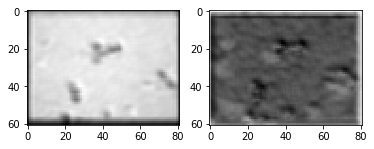

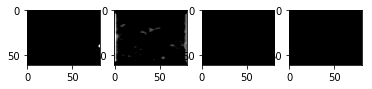

In [18]:
# Loading one sample image for testing
testPath = 'ALL_IDB1/im/'
testImages = os.listdir(testPath)
img1 = plt.imread(testPath+testImages[0])
if use_gpu:
    testInput = Variable(torch.from_numpy(img1).transpose(0,2).transpose(1,2).unsqueeze(0)).float().cuda()
else:
    testInput = Variable(torch.from_numpy(img1).transpose(0,2).transpose(1,2).unsqueeze(0)).float()
# Feed-forward
out = conv_net(testInput)  

# Visualization
if use_gpu:
    out_np = out.squeeze(0).data.cpu().numpy()
else:
    out_np = out.squeeze(0).data.numpy()

mask1 = np.ones(out_np.shape)
for n1 in range(512):
    mask1[n1] = weights[0,n1]*mask1[n1]
outImg1 = np.sum(np.multiply(mask1,out_np),axis=0)

# Averaged activation map
plt.figure()
plt.subplot(121)
plt.imshow(np.sum(out_np,axis=0)/512,cmap='gray')
# Weighted-sum activation map
plt.subplot(122)
plt.imshow(outImg1,cmap='gray')

# Activation maps chosen at random
plt.figure()
randIdx = np.random.randint(0,511,4)
plt.subplot(141)
plt.imshow(out_np[randIdx[0]],cmap='gray')
plt.subplot(142)
plt.imshow(out_np[randIdx[1]],cmap='gray')
plt.subplot(143)
plt.imshow(out_np[randIdx[2]],cmap='gray')
plt.subplot(144)
plt.imshow(out_np[randIdx[3]],cmap='gray')

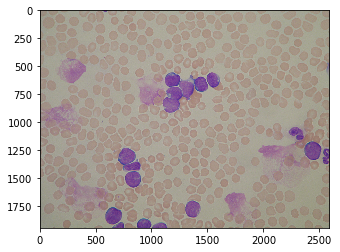

In [19]:
plt.imshow(img1)